In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = open('adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([
            chr_int(data1[0]), data1[1],
            chr_int(data1[2]), data1[3],
            chr_int(data1[4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int(data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1[13], data1[14].strip()
        ])

What does the  'r' do in the first line?
R indicates to open the file and read the file, turning it into a string, rather than writing into the file. These quotes ' ' indicate that it is a string
Describe the function chr_int in the second line
The isdigit() method returns True if all the characters are digits, otherwise False
Try compiling this with the "data1 - line.split(',') without that space, what happens?
data = [] means initializing an empty array, taking away the space will look for a place in the data without the space. If there is no place in the data with that identical lack of a space, then there will be nothing to output. With the space is the same condition 

Worksheet 3
What might be the best data structure to place this data in?
Data Frame 

In [5]:
#turn data (which is currently in an array) into a dataframe 
adult = pd.DataFrame(
    data,
    columns = [
        'age', 'type-employer', 'fnlwgt',
        'education', 'education_num', 'marital',
        'occupation', 'relationship', 'race', 
        'sex', 'capital_gain', 'capitol_loss',
        'hr_per_week', 'country', 'income'
        
    ]
)
adult.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Worksheet 4
Notice in the last cell we listed a bunch of column names, but the original data file didnt have any colomn names. How does Python know how to associate a column name to its column?
Python knows when to associate column names to its matching column because we set the column names during 
columns = [
        'age', 'type-employer', 'fnlwgt',
        'education', 'education_num', 'marital',
        'occupation', 'relationship', 'race', 
        'sex', 'capital_gain', 'capitol_loss',
        'hr_per_week', 'country', 'income'
        
     Python finds these case sensitive words and now knows that when any of these are individually mentioned, to associate them to its own column. 

# Worksheet 5
Print the first few lines of the adult dataframe. Go to the pandas documentation website and read about the 'columns' parameter. 
Columns parameter is an index and assigns columns in an array-like fashion. These column lables are used for a resulting dataframe. 

# Recall the guiding research question
"Are men more likely than women to become high income earners?" where high income earners are those who earn more than $50k/year.

This question is just asking if the proportion of men who earn above 50k higher, equal, or less than the proportion of all women who earn above 50k. This is different than asking if male ER doctors earn more than female ER doctors, e.g.

# We'll use this research question to inspire the creating of several sub-dataframes to make our analysis a bit easier.
Here are some examples
all men
all women
high income men
high income women
low income men 
low income women 

In [6]:
#filtering columns
men = adult[adult['sex'] == 'Male']
women = adult[adult['sex'] == 'Female']
men_high_income = adult[(adult['sex']== 'Male') & (adult['income'] == '>50K')]
women_high_income = adult[(adult['sex']== 'Female') & (adult['income'] == '>50K')]
men_low_income = adult[(adult['sex']== 'Male') & (adult['income'] == '<=50K')]
women_low_income = adult[(adult['sex']== 'Female') & (adult['income'] == '<=50K')]

In [7]:
men

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


Working on this next Tuesday  

# Module 2 Topic 3 -- EDA Basics
One of the tasks of EDA is to find out how much and what what kind of data you have. One way of finding "how much" is the following 

In [8]:
adult.shape

(32561, 15)

Notice there are 15 columns. These are alternatively called 
* column
* variable
* feature
* covariate 

# Worksheet 1
Find the size of some of those dataframes: men, women, men_high_income etc

In [9]:
men.shape

(21790, 15)

Some questions to think about when performing an EDA
* What are the features/variables/columns in this dataset?
* Are they numerical or categorical?
* Does the data seem to be sensible? Is it relevant?
* Does the data seem to be in the right scale? 0.000031 meters should be 31 micrometers 
* Does it seem like theres alot of missing data?
* Do you know what all the variables are? e.g what is "education_number" or "inlwgt"

# Module 2 Topic 4 -- Removing Outliers 

Three ways to remove outliers:
1) domain expertise.. no statisitcs needed. 
2) mean/standard deviation method 
3) median/fnterquartile range method 

The idea for 2,3 is that we want to remove outliers that are too far from the center of our dataset.
Three questions we need answers for to do this 
1) What is the center of the data?
2) How do we measure distance in a dataset?
3) How far is too far?

# The mean/standard deviation method

In [10]:
adult['age'].mean()

38.58164675532078

# Worksheet M2T4
find the mean age of men, women, women_high_income, men_high_income 

In [11]:
men['age'].mean()

39.43354749885268

In [12]:
men_high_income['age'].mean()

44.62578805163614

In [13]:
women['age'].mean()

36.85823043357163

In [14]:
women_high_income['age'].mean()

42.125530110262936

In [15]:
# the variance of the age of adults 
adult['age'].var()

186.06140024879625

In [16]:
men['age'].var()

178.77375174530096

In [17]:
women['age'].var()

196.3837063948037

In [18]:
women_high_income['age'].var()

109.41377041059503

In [19]:
men_high_income['age'].var()

109.94506674864817

In [20]:
print women['age'].std()
print men['age'].std()
print women_high_income['age'].std()
print men_high_income['age'].std()

14.0136970994
13.3706301925
10.4601037476
10.4854693147


In [21]:
# the standard deviation of the age 
adult['age'].std()

13.640432553581146

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B87F400>,
      dtype=object)

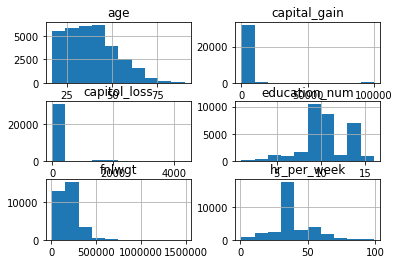

In [22]:
adult.hist()

In [23]:
#Worksheet 3
#How can we change the size of this? Look up histogram functions on google and ways to increse the size 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9C66D8>,
      dtype=object)

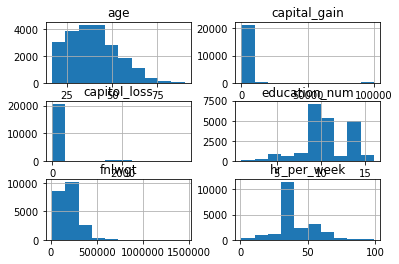

In [24]:
#Worksheet 4
# Make a histogram for all the numerical variables in the men, women, high and low income dataframes
men.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CFD50F0>,
      dtype=object)

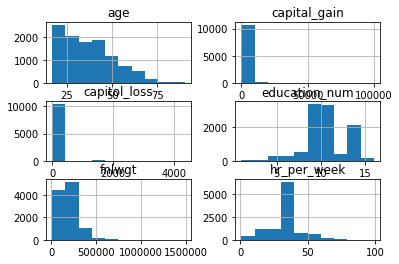

In [25]:
women.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D98B978>,
      dtype=object)

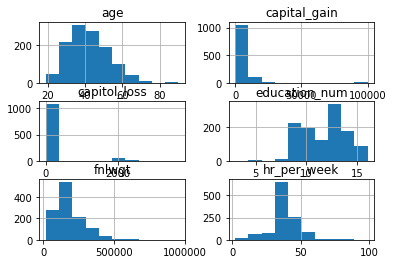

In [26]:
women_high_income.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0A21D0>,
      dtype=object)

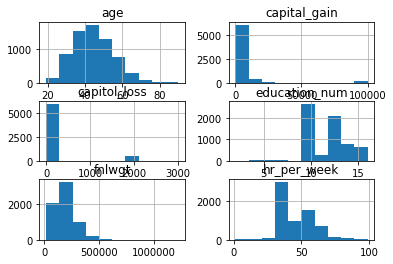

In [27]:
men_high_income.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E42A7B8>,
      dtype=object)

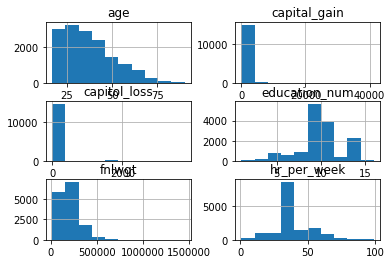

In [28]:
men_low_income.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EB9C6A0>,
      dtype=object)

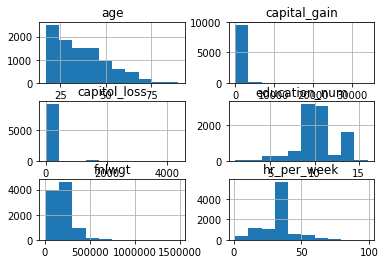

In [29]:
women_low_income.hist()

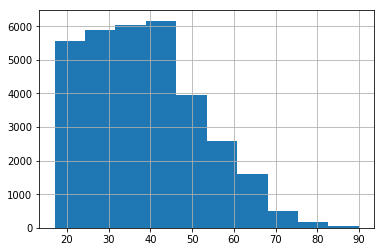

In [30]:
# make a histogram for a single column 
adult['age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5D8860>]],
      dtype=object)

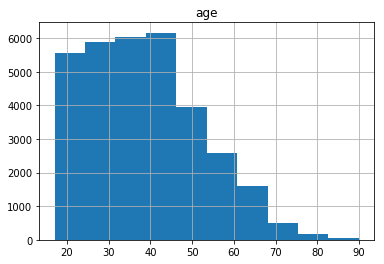

In [31]:
adult.hist(column = 'age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F7D6EB8>,
      dtype=object)

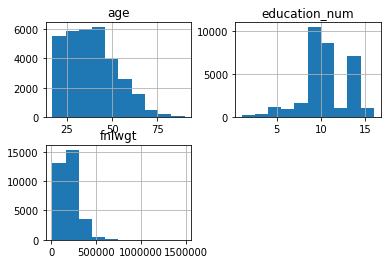

In [32]:
#making several histograms 
adult.hist(column = ['age', 'fnlwgt', 'education_num'])

Some questions to ask yourself at this point
* do any variables seem not useful or redundant?
* are there better (wider/narrower) bin widths for histograms?
* should we turn any of the numerical variables into categorical variables?
* are there any unexpected distributions?
* any immediately apparent outliers?

## Center and Distance -- Median and InterQuartile Range (IQR)

Median is another kind of average, the measure that captures the middle data point (if off number of data points) or the mean of the middle two data points (if even number of data points).

In [33]:
adult['age'].median()

37.0

#  Worksheet 5

Find the median ages of the men, women, high income men, high income women

In [34]:
men['age'].median()

38.0

In [35]:
women.median()

age                  35.0
fnlwgt           176077.0
education_num        10.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
dtype: float64

In [36]:
women_high_income.median()

age                  41.0
fnlwgt           172274.0
education_num        13.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
dtype: float64

In [37]:
men_high_income.median()

age                  44.0
fnlwgt           176740.0
education_num        12.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          44.0
dtype: float64

## Quantiles

A quantile is a way to split up the dataset into equal sized pieces.

* percentiles chop up data into 100 pieces
* quartiles chop up the data in 4 pieces
* quintiles chop up data into 5 pieces 

**example**
Consider the dataset {1, 2, 24, 36, 1345}
* 1 is the 0th percentile
* 2 is the 25th percentile or 1st quartiles
* 24 is the 50th percentiule or 2nd quartile
* etc

## Worksheet 6 
What is another name for the 50% percentile?
ans: median 

Quantiles aren't always numbers in the dataset (e.g. the 50th percentile of the data set {1,2} is 1.5.
The 10th percentile of the data set {1,2} is 1.1 (we interpolate 10% of the way from 1 to 2)

In [38]:
# computing quantiles in python
print adult['age'].quantile(0.1) # 10th percentile 
print adult['age'].quantile(0.25) # 25th percentile or 1st quartile 
print adult['age'].quantile(0.50) # 50th percentile or 2nd quartile

22.0
28.0
37.0


The interquartile range is our measure of distance between datapoints 

IQR = 3rd quartile - 1st quartile 

In [39]:
# computing quantiles in python
print men['age'].quantile(0.1) # 10th percentile 
print men['age'].quantile(0.25) # 25th percentile or 1st quartile 
print men['age'].quantile(0.50) # 50th percentile or 2nd quartile

# computing quantiles in python
print women['age'].quantile(0.1) # 10th percentile 
print women['age'].quantile(0.25) # 25th percentile or 1st quartile 
print women['age'].quantile(0.50) # 50th percentile or 2nd quartile

# computing quantiles in python
print men_high_income['age'].quantile(0.1) # 10th percentile 
print men_high_income['age'].quantile(0.25) # 25th percentile or 1st quartile 
print men_high_income['age'].quantile(0.50) # 50th percentile or 2nd quartile

# computing quantiles in python
print women_high_income['age'].quantile(0.1) # 10th percentile 
print women_high_income['age'].quantile(0.25) # 25th percentile or 1st quartile 
print women_high_income['age'].quantile(0.50) # 50th percentile or 2nd quartile

23.0
29.0
38.0
20.0
25.0
35.0
31.0
37.0
44.0
29.0
34.0
41.0


In [40]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(men)

age                  19.0
fnlwgt           122945.5
education_num         4.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week           9.0
dtype: float64

In [41]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(women)

age                  21.0
fnlwgt           110968.5
education_num         3.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          10.0
dtype: float64

In [42]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(women_high_income)

age                  15.0
fnlwgt           105272.0
education_num         3.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week           7.0
dtype: float64

In [43]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(men_high_income)

age                  14.00
fnlwgt           113571.75
education_num         4.00
capital_gain          0.00
capitol_loss          0.00
hr_per_week          10.00
dtype: float64

## Worksheet 8

Define a function (using def) that measures the IQR and apply it to adult['age]

In [44]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(adult['age'])

20.0

# Visualize median and IQR with boxplots 

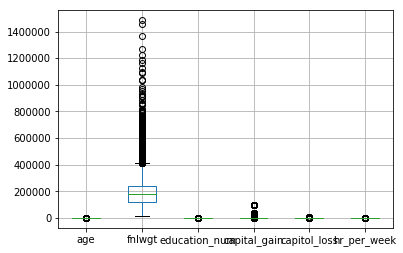

In [45]:
adult.boxplot()

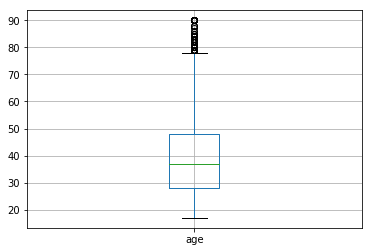

In [46]:
adult.boxplot(column = 'age')

## How far is far enough to be considered an outlier?
1) Consult an expert in the area in which your data lives

2) A technique specific for mean/standard deviation

3) A technique specific for the median/IQR

## Consulting an expert
The expert should simply tell you where the cutoffs are for outliers

In our adult dataset, we may consult an economist or expert in incomes. Suppose our expert says that we only want to consider incomes from people between 22 and 72 years of age. 

Once we have these cutoffs, we'll want to remove any data from ages outide the range before commencing with our more rigorous statistial analysis. 

In [47]:
# create a copy of the dataset as a backup 
adult_original_data = adult

# count the total number of outlier rows at each extreme
print len( adult[adult['age'] < 22] )
print len( adult[adult['age'] > 72] )

# count the total number of outlier rows at each extreme for high income earners
print len( adult[ (adult['income'] == '>50K') & (adult['age'] < 22)] )
print len( adult[ (adult['income'] == '>50K') & (adult['age'] > 72)] )

3130
401
5
69


In [48]:
# create a new dataframe with the outliers dropped 
adult_expert_outlier_drop = adult.drop(
    adult.index[
        (adult['age'] <22) | (adult['age'] > 72)
        
    ]
)
adult_expert_outlier_drop

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Drop outliers using mean and standard deviation 

A. purely applied statistical rule of thumb is that outliers are those datapoints that are more than 2 or 3 standard deviations from the mean. 

In [49]:
# create syntactical sugar
age = adult['age']
income = adult['income']
age_mean = age.mean()
age_std = age.std()

# count the number of outliers we have 
len( adult[ age > age_mean + 2.5*age_std ])
len( adult[ age < age_mean - 2.5*age_std ])

# count the number of outliers we have from high income earners
len( adult[ (income == '>50K') & ( age > age_mean + 2.5*age_std ) ])
len( adult[ (income == '>50K') & ( age < age_mean - 2.5*age_std ) ])

# drop the outliers
adult_expert_outlier_drop = adult.drop(
    adult.index[
        (age > age_mean + 2.5*age_std) | (age < age_mean - 2.5*age_std )
        
    ]
)

adult_expert_outlier_drop


,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Removing outliers using the median and interquartile range 

In this method, the rule of thumb is that any datapoint more than 1.5 IQR's away from the median is considered an outlier. 

In [50]:
# create syntactical sugar
age = adult['age']
income = adult['income']
age_median = age.median()
age_iqr = age.quantile(0.75) - age.quantile(0.25)

# count the number of outliers we have 
len( adult[ age > age_median + 1.5*age_iqr ])
len( adult[ age < age_median - 1.5*age_iqr ])

# count the number of outliers we have from high income earners
len( adult[ (income == '>50K') & ( age > age_median + 1.5*age_iqr ) ])
len( adult[ (income == '>50K') & ( age < age_median - 1.5*age_iqr ) ])

# drop the outliers
adult_median_outlier_drop = adult.drop(
    adult.index[
        (age > age_median + 1.5*age_iqr) | (age < age_median - 1.5*age_iqr )
        
    ]
)

print age > age_median + 1.5*age_iqr
print age < age_median - 1.5*age_iqr
adult_median_outlier_drop


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533    False
32534    False
32535    False
32536    False
32537    False
32538    False
32539     True
32540    False
32541    False
32542     True
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Name: age, Length: 32561, dtype: bool
0        False
1        False
2        False
3 

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Module 2 Topic 5 -- Exploratory Data Analysis 

The outliers have been removed, so we should commence our EDA.

Let's work with the datafram obtained by an expert removing the outliers

In [51]:
adult_eda = adult_expert_outlier_drop

adult_eda.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Measures of Centrality and Spread 

This is where we find the mean or median for all numerical variables as well as standard deviation or interquartile range. We also like to depict them using histograms or boxplots.

### Worksheet Question 1
For the adult_eda dataframe, find the mean, standard deviation, median, and IQR for men and women. Also draw histograms and boxplots.

In [52]:
men_eda = adult_eda[adult_eda['sex'] == 'Male']
women_eda = adult_eda[adult_eda['sex'] == 'Female']
men_high_income_eda = adult_eda[(adult_eda['sex']== 'Male') & (adult_eda['income'] == '>50K')]
women_high_income_eda = adult_eda[(adult_eda['sex']== 'Female') & (adult_eda['income'] == '>50K')]
men_low_income_eda = adult_eda[(adult_eda['sex']== 'Male') & (adult_eda['income'] == '<=50K')]
women_low_income_eda = adult_eda[(adult_eda['sex']== 'Female') & (adult_eda['income'] == '<=50K')]

In [53]:
men_eda.median()

age                  38.0
fnlwgt           180303.0
education_num        10.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
dtype: float64

In [54]:
women_eda.median()

age                  35.0
fnlwgt           176317.0
education_num        10.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
dtype: float64

In [55]:
print men_eda.quantile(0.1) # 10th percentile

print men_eda.quantile(0.25) # 25th percentile or 1st quartile 

print men_eda.quantile(0.50) # 50th percentile or 2nd quartile

age                 23.0
fnlwgt           65624.0
education_num        7.0
capital_gain         0.0
capitol_loss         0.0
hr_per_week         30.0
Name: 0.1, dtype: float64
age                  29.0
fnlwgt           118477.5
education_num         9.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
Name: 0.25, dtype: float64
age                  38.0
fnlwgt           180303.0
education_num        10.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
Name: 0.5, dtype: float64


In [56]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(men_eda)

age                  19.0
fnlwgt           123143.5
education_num         4.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          10.0
dtype: float64

In [57]:
print women_eda.quantile(0.1) # 10th percentile

print women_eda.quantile(0.25) # 25th percentile or 1st quartile 

print women_eda.quantile(0.50) # 50th percentile or 2nd quartile

age                 20.0
fnlwgt           65866.0
education_num        7.0
capital_gain         0.0
capitol_loss         0.0
hr_per_week         20.0
Name: 0.1, dtype: float64
age                  25.0
fnlwgt           117496.0
education_num         9.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          32.0
Name: 0.25, dtype: float64
age                  35.0
fnlwgt           176317.0
education_num        10.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week          40.0
Name: 0.5, dtype: float64


In [58]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(women_eda)

age                  21.0
fnlwgt           111074.0
education_num         3.0
capital_gain          0.0
capitol_loss          0.0
hr_per_week           8.0
dtype: float64

In [59]:
men_eda.std()

age                  12.707703
fnlwgt           106938.631907
education_num         2.646406
capital_gain       8310.885356
capitol_loss        429.189650
hr_per_week          11.938301
dtype: float64

In [60]:
women_eda.std()

age                  13.322495
fnlwgt           103183.088201
education_num         2.367265
capital_gain       4942.020513
capitol_loss        335.137990
hr_per_week          11.677550
dtype: float64

In [61]:
men_eda.mean()

age                  38.944839
fnlwgt           192101.651285
education_num        10.112738
capital_gain       1320.779451
capitol_loss        100.054092
hr_per_week          42.610158
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000103DC630>,
      dtype=object)

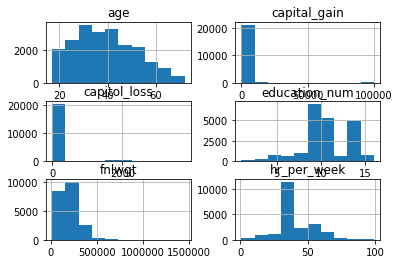

In [62]:
men_eda.hist()

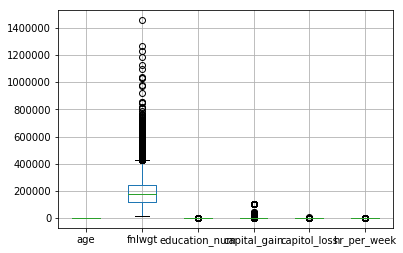

In [63]:
men_eda.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013B83588>,
      dtype=object)

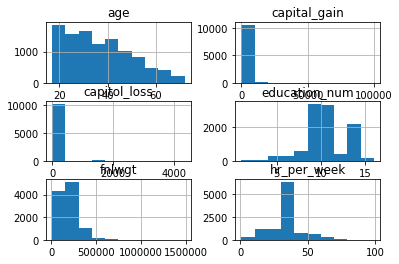

In [64]:
women_eda.hist()

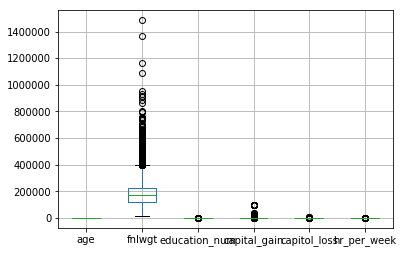

In [65]:
women_eda.boxplot()

## Measures of Symmetry

How symmetric is your data? We know it's the center (the mean), so is your data symmetric about the mean or is it skewed to one direction?

Consider three simple datasets 

1) {1, 2, 3} is symmetric about the median or the center, which is 2. This would have a skew 0

2) {1, 2, 100} is not symmetric about the median, there is more weight to the right. We say this is skewed to the right.

3) {-100, 2, 3} is not symmetric about the median, there is more weight to the left. We say this is skewed to the left. 

A rule of thumb for determining skewness

1) mean < median => skewed left 

2) mean = median => no skew 

3) mean > median => skewed right 

There is an equation for skewness 

$$ g_1 = \dfrac{1}{n-1}\dfrac{\sum_i (x_i - \bar{x} )^3}{s^3} $$

There are many variants to this version of skew.

In [66]:
# compute the skew of age
print adult_eda['age'].skew()

# mean and median age 
print adult_eda['age'].mean()
print adult_eda['age'].median()

0.3983622934620554
38.088028607
37.0


## Worksheet 2

Compute the skew of the age for men, women, high income men and high income women.

In [67]:
men_eda['age'].skew()

0.34992577308885336

In [68]:
women_eda['age'].skew()

0.5341130442119814

In [69]:
men_high_income_eda['age'].skew()

0.26656551939743706

In [70]:
women_high_income_eda['age'].skew()

0.3873252535478764

We can use skewness by observing the histogram of a variable.

36.3553237478
35.0


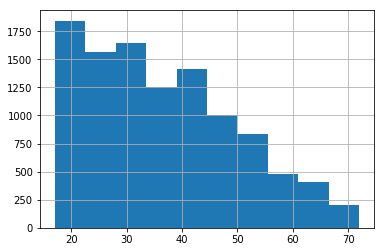

In [71]:
print women_eda['age'].mean()
print women_eda['age'].median()

women_eda['age'].hist()

In [72]:
# define a correlation matrix, gathers the correlation between all numerical variables of a data frame 
# in a single matrix

adult_corr_matrix = adult_eda.corr()
print adult_corr_matrix

                    age    fnlwgt  education_num  capital_gain  capitol_loss  \
age            1.000000 -0.071773       0.051285      0.080271      0.058927   
fnlwgt        -0.071773  1.000000      -0.044043      0.000123     -0.010262   
education_num  0.051285 -0.044043       1.000000      0.122235      0.079847   
capital_gain   0.080271  0.000123       0.122235      1.000000     -0.031499   
capitol_loss   0.058927 -0.010262       0.079847     -0.031499      1.000000   
hr_per_week    0.118294 -0.021954       0.146858      0.079193      0.055352   

               hr_per_week  
age               0.118294  
fnlwgt           -0.021954  
education_num     0.146858  
capital_gain      0.079193  
capitol_loss      0.055352  
hr_per_week       1.000000  


In [79]:
import seaborn as sns

# plot a correlation heatmap 
sns.heatmap(
    adult_corr_matrix,
    xticklabels = adult_corr_matrix.columns,
    yticklabels = adult_corr_matrix.columns,
    annot = True
)annual

SyntaxError: invalid syntax (<ipython-input-79-e5cd5ff6f5a8>, line 9)

Scatterplots offer a visual to see the relationship between numerical variables with more detail than the single value that is the correlation that can offer

In [ ]:
sns.scatterplot(data = adult_eda, x = "age", y = "fnlwgt", hue = "sex")
plt.show()

In [ ]:
sns.scatterplot(data = adult_eda, x = "age", y = "fnlwgt")
plt.show()

In [ ]:
# customize the plot by sizing points different according to a third numerical variable
sns.scatterplot(data = adult_eda, x = "age", y = "fnlwgt", size = "education_num")
plt.show()

## Bar Charts for Categorical Variables 

In [ ]:
# to draw a bar chart, we need to count the number of times each vale appears in a categorical variable
# the way to do this is to use the groupby function

# 1 -- worksheet -- answer worksheet question 4
count_emp = adult.groupby(["type-employer"]).size()
print count_emp

In [ ]:
count_emp.plot(kind = 'barh')

## Question 4, Worksheet M2T5

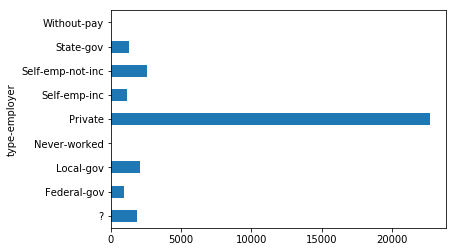

In [78]:
count_emp = adult.groupby(['type-employer']).size() # this part of the code narrows the dataframe down to only the type-employer column 
count_emp.plot(kind = 'barh') # this line puts the type-employer column and all of its potential answers from the data into a bar graph

In further analysis and model building, we may not want to include levels/values of categorical variables whose bars are too short. We may want to combine them into a single category, e.g gov/self-emp/self-emp-inc. The reason is, it can lead to overfitting. 

## The Bootstrap

In [ ]:
def mean_bootstrap(sample_data, number_of_resamples):
    x = [0]*number_of_resamples # initializes an array 
    for i in range(number_of_resamples):
        resample = [sample_data[j]
            for j 
            in np.random.randint(len(sample_data), size = len(sample_data))
        ]
        x[i] = np.mean(resample)
    return x

In [ ]:
m = mean_bootstrap(adult['age'], 100)
plt.hist(m)
plt.show()

In [ ]:
print "The mean age of our empirical distribution is", np.mean(m)
print "The standard error of our empirical distribution is", np.std(m)
print "The mean age of all adults in out sample is", np.mean(adult['age'])